# Machine Learning Project

- Mrinal Kanti Saha (21234)

### About Dataset and problem:

The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement. 

You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 

Dimensions: (to be added later)

    Columns: ['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',

              'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',

              'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',

              'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']

 Learn and predict the OUTCOME variable.

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the data

In [2]:
df = pd.read_csv('AnalyticsOlympiad2022Data/AnalyticsOlympiad2022Data/train.csv')

We have loaded our data. Now, we would like to see how our data looks like.

In [3]:
df.sample(5)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
3465,365982,65+,female,0-9y,high school,upper class,0.528074,1.0,after 2015,1.0,1.0,10238,7000.0,0,0,0,0.0,Sports Car
12206,5472,65+,male,10-19y,none,upper class,0.491658,0.0,before 2015,1.0,1.0,10238,14000.0,1,0,0,1.0,Sedan
89587,106237,26-39,male,10-19y,university,working class,0.661839,1.0,before 2015,1.0,1.0,10238,11000.0,0,0,0,0.0,Sports Car
30811,77040,65+,male,20-29y,university,upper class,0.609223,1.0,before 2015,1.0,0.0,34311,12000.0,1,0,0,0.0,HatchBack
23119,358006,40-64,male,0-9y,high school,upper class,0.671600,1.0,before 2015,1.0,1.0,34315,14000.0,0,0,0,0.0,Sedan


Let's see the size of the dataset.

In [4]:
df.shape

(105000, 18)

Basic numerical summary of the dataframe :-

In [5]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,394931.295905,0.602173,0.827038,0.584143,0.520000,18045.439267,11061.228571,0.675676,0.129733,0.549314,0.422648
std,279694.106053,0.138045,0.378216,0.492871,0.499602,16709.040449,2972.355482,1.383678,0.589714,1.402809,0.493983
min,101.000000,0.066880,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,156351.750000,0.514876,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
50%,354679.500000,0.601112,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000
75%,598602.250000,0.703216,1.000000,1.000000,1.000000,22957.750000,13000.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,0.954075,1.000000,1.000000,1.000000,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000


## Data Cleaning
- Removing null values
- Removing duplicates

In [6]:
# dropping column ID
df.drop(columns=['ID'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  105000 non-null  object 
 1   GENDER               105000 non-null  object 
 2   DRIVING_EXPERIENCE   105000 non-null  object 
 3   EDUCATION            105000 non-null  object 
 4   INCOME               105000 non-null  object 
 5   CREDIT_SCORE         105000 non-null  float64
 6   VEHICLE_OWNERSHIP    105000 non-null  float64
 7   VEHICLE_YEAR         105000 non-null  object 
 8   MARRIED              105000 non-null  float64
 9   CHILDREN             105000 non-null  float64
 10  POSTAL_CODE          105000 non-null  int64  
 11  ANNUAL_MILEAGE       105000 non-null  float64
 12  SPEEDING_VIOLATIONS  105000 non-null  int64  
 13  DUIS                 105000 non-null  int64  
 14  PAST_ACCIDENTS       105000 non-null  int64  
 15  OUTCOME          

In [8]:
df.isna().sum()

AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

Since, we have no null values, we will proceed with with removing duplicates.

In [9]:
df.duplicated().sum()

0

Again, we also have no duplicates.

Let's see how out target feature is correlated with the other features.

In [10]:
df.corr()["OUTCOME"]

CREDIT_SCORE          -0.003068
VEHICLE_OWNERSHIP     -0.003074
MARRIED               -0.006028
CHILDREN               0.001869
POSTAL_CODE           -0.002801
ANNUAL_MILEAGE        -0.001104
SPEEDING_VIOLATIONS    0.000151
DUIS                   0.000382
PAST_ACCIDENTS        -0.002343
OUTCOME                1.000000
Name: OUTCOME, dtype: float64

`Inference` : 
None of the features are correlated with OUTCOME.

## Exploratory Data Analysis and Data Visualization

In [11]:
plt.style.use('ggplot')

<strong>Instead of going through the dataframe, to look at the type of values each feature contains, I am using the `PandasProfiling` to generate a report of distributions, missing values, correlations of all the features.</strong>

In [12]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='Report.html')
prof.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Msc 2\anaconda3\envs\PyG\lib\site-packages\scipy\stats\_stats_py.py:4868: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Let's see how all the variables affect the outcome of the claim.

In [13]:
df

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,0.0,0.0,31885,9000.0,2,0,0,0.0,SUV
104996,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,1.0,0.0,32277,10000.0,0,0,0,1.0,Sedan
104997,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,1.0,0.0,34800,11000.0,0,0,0,1.0,Sedan
104998,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,0.0,HatchBack


#### 1. How credit score, milage, no of speeding violations, duis and number of past accidents affects the outcome of the claim?

In [15]:
cred_pt = pd.pivot_table(df, index='OUTCOME', values='CREDIT_SCORE', aggfunc=np.mean)
cred_pt

,CREDIT_SCORE
OUTCOME,
0.0,0.602535
1.0,0.601678


In [16]:
mile_pt = pd.pivot_table(df, index='OUTCOME', values='ANNUAL_MILEAGE', aggfunc=np.mean)
mile_pt

,ANNUAL_MILEAGE
OUTCOME,
0.0,11064.036158
1.0,11057.393303


In [17]:
svio_pt = pd.pivot_table(df, index='OUTCOME', values='SPEEDING_VIOLATIONS', aggfunc=np.mean)
svio_pt

,SPEEDING_VIOLATIONS
OUTCOME,
0.0,0.675497
1.0,0.675921


In [18]:
duis_pt = pd.pivot_table(df, index='OUTCOME', values='DUIS', aggfunc=np.mean)
duis_pt

,DUIS
OUTCOME,
0.0,0.129540
1.0,0.129997


In [19]:
past_pt = pd.pivot_table(df, index='OUTCOME', values='PAST_ACCIDENTS', aggfunc=np.mean)
past_pt

,PAST_ACCIDENTS
OUTCOME,
0.0,0.552126
1.0,0.545473


`Inference`:-

We had previously seen that our target variable, OUTCOME, bears no correlation with any of the numerical columns. 

By Creating pivot tables of Outcome vs Various Numerical Columns, we can see that OUTCOME is not affected in any significant way by any of those features.

#### 2. How driving experience incluence past accident?

In [20]:
driv_past = pd.pivot_table(df, index='DRIVING_EXPERIENCE', values='PAST_ACCIDENTS', aggfunc=np.mean)

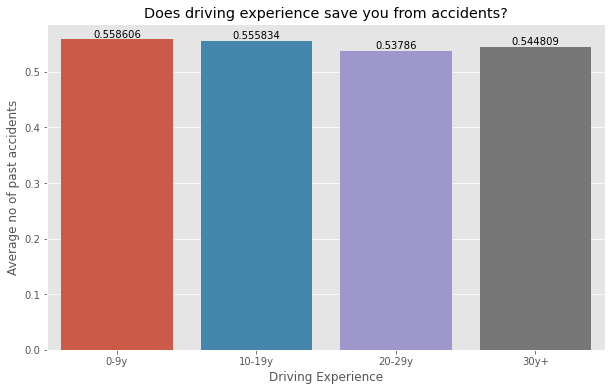

In [96]:
plt.figure(figsize=(10,6))
p = sns.barplot(data=driv_past, y='PAST_ACCIDENTS', x=driv_past.index, orient='v')
plt.title('Does driving experience save you from accidents?')
plt.ylabel('Average no of past accidents')
plt.xlabel('Driving Experience')
for i in p.containers:
    p.bar_label(i,)
plt.show()

`Inference`:-
- Nothing conclusive can be inferred from the plot, as all the bars are very close together. Mostly because past accidents only goes for 0 and 1 and not the no of past accidents, hence we miss out on them.

#### 3. Are age and past accidents related?

In [22]:
age_past = pd.pivot_table(df, index='AGE', values='PAST_ACCIDENTS', aggfunc=np.mean)

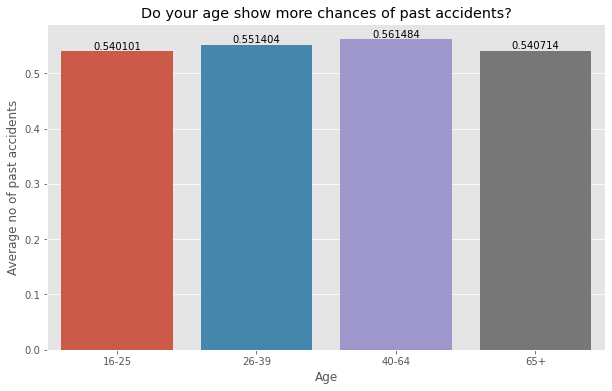

In [95]:
plt.figure(figsize=(10,6))
p = sns.barplot(data=age_past, y='PAST_ACCIDENTS', x=age_past.index, orient='v')
plt.title('Do your age show more chances of past accidents?')
plt.ylabel('Average no of past accidents')
plt.xlabel('Age')
for i in p.containers:
    p.bar_label(i,)
plt.show()

`Inference`:-
- Nothing conclusive can be inferred from the plot, again, as all the bars are very close together. Mostly because past accidents only goes for 0 and 1 and not the no of past accidents, hence we miss out on them.

#### 4. Are type of vehicle and past accidents related?

In [76]:
past_type = pd.pivot_table(df, index='TYPE_OF_VEHICLE', values='PAST_ACCIDENTS', aggfunc=np.mean)

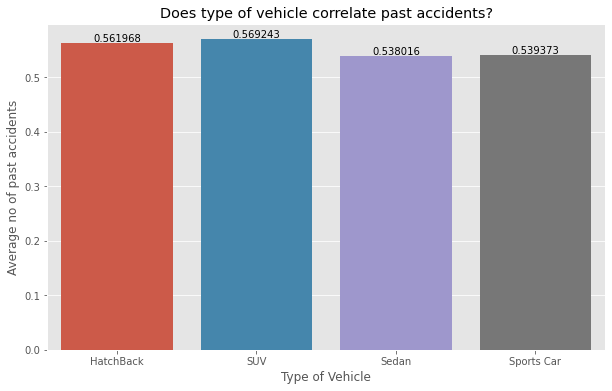

In [93]:
plt.figure(figsize=(10,6))
p = sns.barplot(data=past_type, y='PAST_ACCIDENTS', x=past_type.index, orient='v')
plt.title('Does type of vehicle correlate past accidents?')
plt.ylabel('Average no of past accidents')
plt.xlabel('Type of Vehicle')
for i in p.containers:
    p.bar_label(i,)
plt.show()

`Inference`:-
    
- Though the difference is very small. But it is interesting to see that Sports Cars and Sedans are bit less likely to be involved in past accidents than SUVs and HatchBacks

#### 5. How income and type of vehicle are correlated?

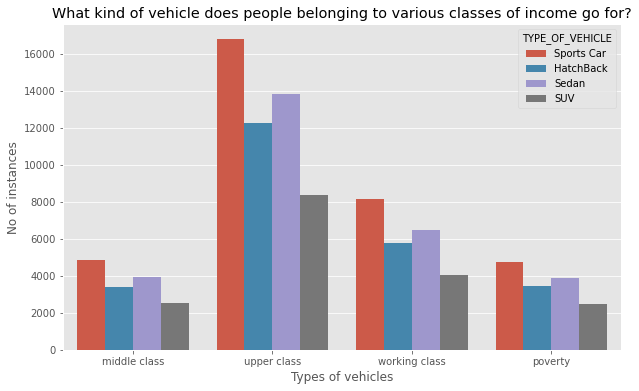

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='INCOME', hue='TYPE_OF_VEHICLE')
plt.title('What kind of vehicle does people belonging to various classes of income go for?')
plt.ylabel('No of instances')
plt.xlabel('Types of vehicles')
plt.show()

`Inference`:
- Preferred vehicle type : Sports > Sedan > HatchBack > SUV.
- No difference in preference(or usage) between the 4 classes of income.

#### 5. How education and type of vehicle are correlated?

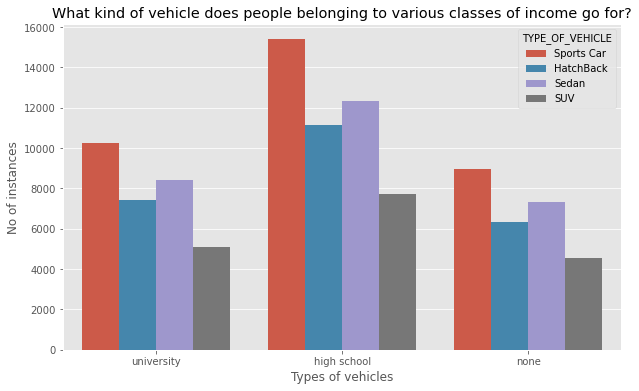

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='EDUCATION', hue='TYPE_OF_VEHICLE')
plt.title('What kind of vehicle does people belonging to various education backgrounds go for?')
plt.ylabel('No of instances')
plt.xlabel('Types of vehicles')
plt.show()

`Inference`:
- Preferred vehicle type : Sports > Sedan > HatchBack > SUV.
- No difference in preference(or usage) between the three classes of education.

#### 6. How is credit score distributed among varis class of income?

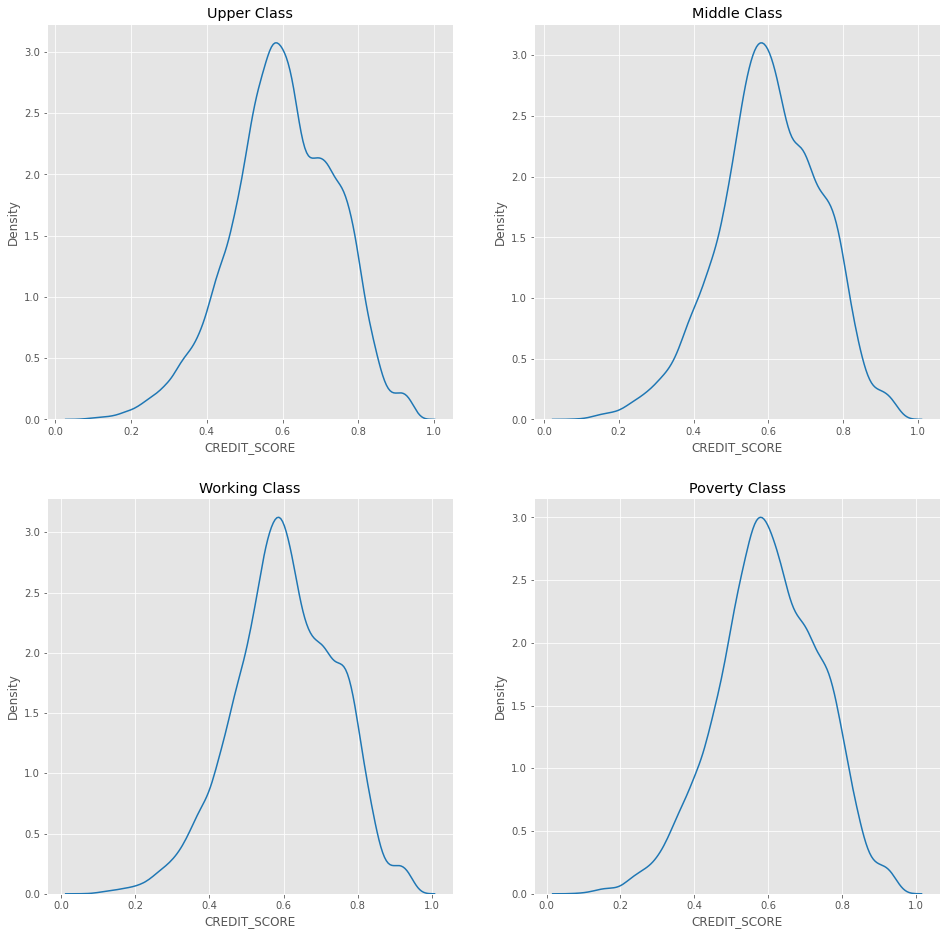

In [61]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.kdeplot(df[df['INCOME']=='upper class']['CREDIT_SCORE'], color='tab:blue')
plt.title('Upper Class')
plt.subplot(2,2,2)
sns.kdeplot(df[df['INCOME']=='middle class']['CREDIT_SCORE'], color='tab:blue')
plt.title('Middle Class')
plt.subplot(2,2,3)
sns.kdeplot(df[df['INCOME']=='working class']['CREDIT_SCORE'], color='tab:blue')
plt.title('Working Class')
plt.subplot(2,2,4)
sns.kdeplot(df[df['INCOME']=='poverty']['CREDIT_SCORE'], color='tab:blue')
plt.title('Poverty Class')
plt.show()

`Inference`:-
- Nothing conclusive can be inferred from the plot, again, as all the distributions are nearly the same.
- No matter which Income background, you are from, the credit score is distributed in the same way.

#### 7. What type of vehicle do the genders prefer(or use)?

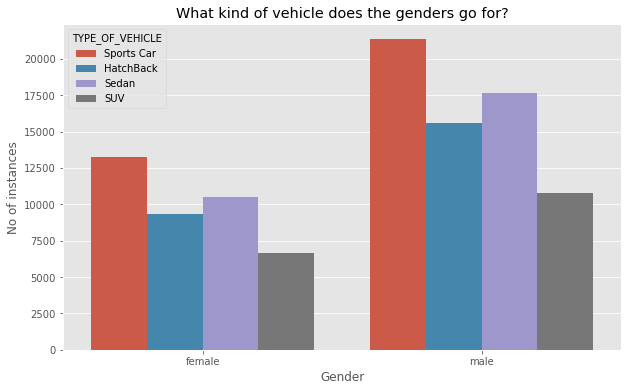

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, hue='TYPE_OF_VEHICLE', x='GENDER')
plt.title('What kind of vehicle does the genders go for?')
plt.ylabel('No of instances')
plt.xlabel('Gender')
plt.show()

`Inference`:
- Preferred vehicle type : Sports > Sedan > HatchBack > SUV.
- No difference in preference(or usage) between the two genders.

#### 8. Education vs Gender

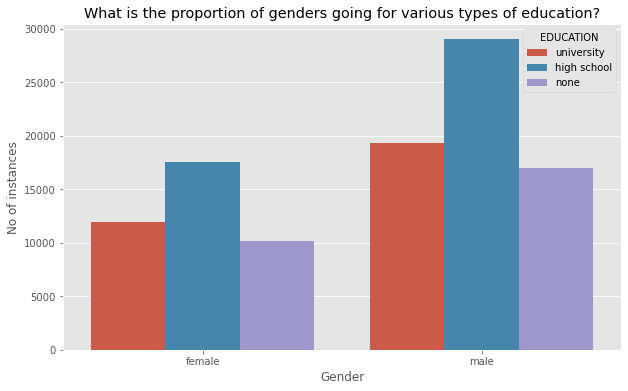

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, hue='EDUCATION', x='GENDER')
plt.title('What is the proportion of genders going for various types of education?')
plt.ylabel('No of instances')
plt.xlabel('Gender')
plt.show()

Again, there is no difference in the proportions, only difference in scale due to the presense of more male datapoints. 

#### 9. Speeding violations Vs Type of Vehicle

In [86]:
type_vio = pd.pivot_table(data=df, index='TYPE_OF_VEHICLE', values='SPEEDING_VIOLATIONS', aggfunc=np.mean)

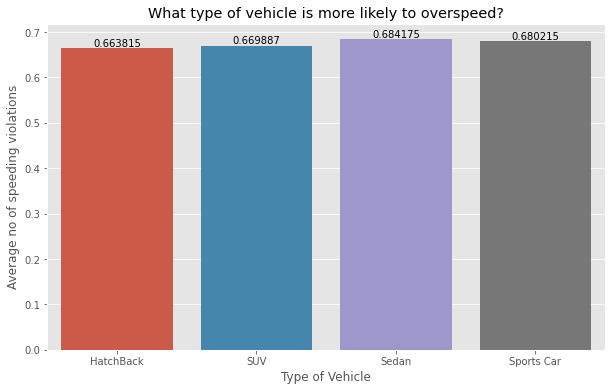

In [91]:
plt.figure(figsize=(10,6))
p = sns.barplot(data=type_vio, y='SPEEDING_VIOLATIONS' , x=type_vio.index)
plt.title('What type of vehicle is more likely to overspeed?')
plt.ylabel('Average no of speeding violations')
plt.xlabel('Type of Vehicle')
for i in p.containers:
    p.bar_label(i,)
plt.show()

Again the difference is very small, but Sedan and Sports cars are again more likely to overspeed.

### Conclusion of the EDA
- The data is created as such that there is absolutely no relation between any of the features and within each categories of every feature.
- As it is the competition dataset, it may be done so to increase its complexity.
- Also, the use of means ensure that we are not baising our observations, like as the number of males in more in our dataset, if we compare any numerical columns with respect to gender using sum, male will alwasy come to be more.
- Doing any further EDA would not give huge insights. Hence, we will go for feature engineering.

## Feature Engineering

#### We will sample 30000 rows of all, so as to reduce computation, and also in the process balance our data.

In [10]:
df1 = df[df['OUTCOME'] == 1].sample(20000, random_state=34)
df0 = df[df['OUTCOME'] == 0].sample(20000, random_state=34)
# concatenating the dataframes
df_new = pd.concat([df0, df1], axis=0)
# shuffling the rows of the balanced dataframe
df_new = df_new.sample(frac=1, random_state=34)

#### First, we will split the dataset into training and testing dataset before any kind of feature engineering. 

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('OUTCOME', axis=1), 
                                                    df_new['OUTCOME'], 
                                                    test_size=0.3, 
                                                    random_state=42)
X_train.shape, X_test.shape

((28000, 16), (12000, 16))

In [15]:
y_test.value_counts()

0.0    6041
1.0    5959
Name: OUTCOME, dtype: int64

#### Second, we will encode the categorical variables as needed, `Ordinal` or `One-Hot`.

In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [17]:
ordinal_list = [
    ['none', 'high school', 'university'],                         # education
    ['0-9y', '10-19y', '20-29y', '30y+'],                          # experience
    ['16-25', '26-39', '40-64', '65+'],                            # age
    ['poverty', 'working class', 'middle class', 'upper class'],   # income
    ['before 2015', 'after 2015']                                  # vehicle year
]

#### We will be using `ColumnTransformer` for the encoding as we would be using `Pipeline` later on.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
tf_encode = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=ordinal_list),
    ['EDUCATION', 'DRIVING_EXPERIENCE', 'AGE', 'INCOME', "VEHICLE_YEAR"]),
    
    ('one-hot', OneHotEncoder(drop='first', sparse=False),
    ['GENDER', 'TYPE_OF_VEHICLE'])
], remainder='passthrough')

In [20]:
X_train_enc = tf_encode.fit_transform(X_train)
X_test_enc  = tf_encode.fit_transform(X_test)

## Modelling

As Tree-based Models do not need any type of Feature Scaling, we can directly feed our encoded dataset into them.

In [21]:
models_df = pd.DataFrame(columns=['Model Class','Accuracy','F1-score','Threshold','Parameters'])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer, accuracy_score, f1_score

In [24]:
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

### 1. Decision Trees

#### First, we will train a vanilla `DecisionTreeClassifier`, then proceed to hyperparameter tuning using `RandomizedSearchCV`

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_enc, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred_train = model.predict(X_train_enc)
y_pred       = model.predict(X_test_enc)

In [28]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13959
         1.0       1.00      1.00      1.00     14041

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.52      0.51      0.51      6041
         1.0       0.51      0.51      0.51      5959

    accuracy                           0.51     12000
   macro avg       0.51      0.51      0.51     12000
weighted avg       0.51      0.51      0.51     12000



We can very well see that the accuracy on the training set is 100% but the accuracy on the test set is half of it. Hence, overfitting.

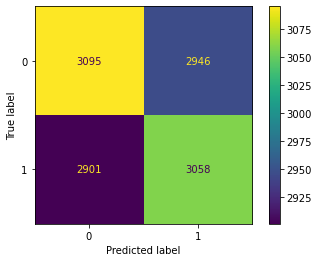

In [29]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

The confusion matrix shows that that model is generating lots of false positives and negatives.

In [30]:
print('Max depth of the Tree is ', model.tree_.max_depth)

Max depth of the Tree is  49


In [31]:
print('Log loss for the test data : ', log_loss(y_test, model.predict_proba(X_test_enc)))

Log loss for the test data :  16.82901879842023


#### Further more, according to the Evaluation criteria, we are supposed to use Log Loss as the metric.

Now, we will do the Hyperparameter tuning using `GridSearchCV`

In [32]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [4000, 5000, 1000],
}

In [33]:
model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, scoring=LogLoss)
grid_search.fit(X_train_enc, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [4000, 5000, 1000]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [34]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 10, 'min_samples_split': 5000}, -0.6961482261993289)

#### Let's see the log loss and accuracy on the test data.

In [35]:
y_pred  = grid_search.predict_proba(X_test_enc)
y_pred_ = grid_search.predict(X_test_enc)

In [36]:
np.unique(y_pred)

array([0.33018868, 0.36723164, 0.40883978, 0.44863563, 0.45887446,
       0.46953782, 0.47957325, 0.47970942, 0.48104265, 0.48603122,
       0.49078404, 0.49241379, 0.50758621, 0.50921596, 0.51396878,
       0.51895735, 0.52029058, 0.52042675, 0.53046218, 0.54112554,
       0.55136437, 0.59116022, 0.63276836, 0.66981132])

In [37]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, y_pred))

Accuracy for our Test data comes out to be 0.5048333333333334
F1 Score for our Test data comes out to be [0.47822269 0.5288614 ]
Log Loss for our Test data comes out to be 0.6947810496332056


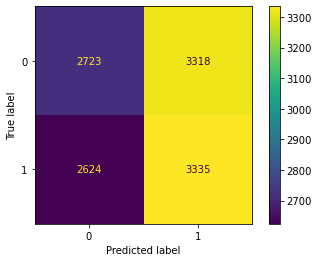

In [38]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred_, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

The model accuracy is pretty low but we can't help it anyway here as the criteria is log loss.

Threshold as 0.5 is not working well in this case.

In [39]:
def post_predict(y_pred, thres):
    temp = (np.array(y_pred) > thres).sum(axis=1)     
    y_pred_ = (temp == 2).astype(np.int16)
    return y_pred_

In [40]:
def tuning_proba(y_pred, y_test):
    f1_max = 0
    thres = 0
    for i in np.linspace(0.4, 0.6, 100):
        y_pred_ = post_predict(y_pred, i)
        f1 = f1_score(y_test, y_pred_, average=None).sum()
        if f1_max < f1:
            f1_max = f1
            thres = i
    return thres, f1_max

In [41]:
thres, _ = tuning_proba(y_pred, y_test)
thres

0.4808080808080808

In [42]:
y_pred_ = post_predict(y_pred, thres)
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))

Accuracy for our Test data comes out to be 0.5014166666666666
F1 Score for our Test data comes out to be [0.51035273 0.49214837]


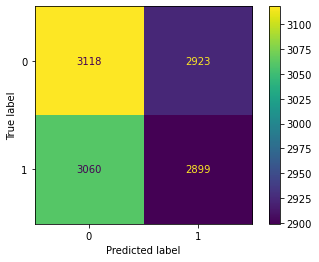

In [43]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred_, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [44]:
models_df = models_df.append({
                'Model Class' : 'Decision Trees',
                'Accuracy'    : accuracy_score(y_test, y_pred_),
                'F1-score'    : str(f1_score(y_test, y_pred_, average=None)),
                'Threshold'   : thres,
                'Parameters'  : str(grid_search.best_params_),
                'Log Loss'    : log_loss(y_test, y_pred)
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\1593412142.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [45]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781


This is the best that can be done with decision trees, with the minimum log loss.

### 2. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_enc, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred_train = model.predict(X_train_enc)
y_pred       = model.predict(X_test_enc)

In [49]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13959
         1.0       1.00      1.00      1.00     14041

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.51      0.51      6041
         1.0       0.50      0.49      0.49      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



Well again, the accuracy is low on the test set and 1 on train set. Hence, Overfitting.

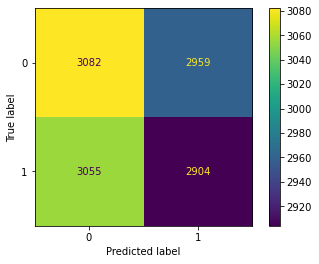

In [50]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In case of Random Forests, we can see that the model is predicting a lot of False Negatives.

In [51]:
print('Average Max depth of the Trees is ', sum([estimator.tree_.max_depth for estimator in model.estimators_])/100)

Average Max depth of the Trees is  38.7


In [52]:
print('Log loss for the test data : ', log_loss(y_test, model.predict_proba(X_test_enc)))

Log loss for the test data :  0.7111013673286825


Now, we will do the Hyperparameter tuning using `GridSearchCV`

In [53]:
param_grid = {
    'n_estimators': [50, 70],
    'max_depth': [10, 20, 30],
    'min_samples_split': [4000, 5000, 1000],
}

In [54]:
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, scoring=LogLoss)
grid_search.fit(X_train_enc, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [4000, 5000, 1000],
                         'n_estimators': [50, 70]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [55]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 10, 'min_samples_split': 4000, 'n_estimators': 70},
 -0.6930412127314265)

#### Let's see the log loss and accuracy on the test data.

In [56]:
y_pred  = grid_search.predict_proba(X_test_enc)
y_pred_ = grid_search.predict(X_test_enc)

In [57]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, y_pred))

Accuracy for our Test data comes out to be 0.5010833333333333
F1 Score for our Test data comes out to be [0.46663697 0.53135029]
Log Loss for our Test data comes out to be 0.6932105064446141


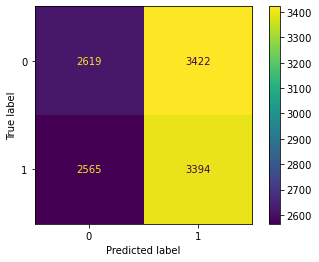

In [58]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred_, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

Clearly, 0.5 as a threshold is not working so we would need to tune it, in a way that maximizes F1 score.
And, we have to lower the probability threshold, so that the model can classify some of the positives correctly.

In [59]:
thres, _ = tuning_proba(y_pred, y_test)
thres

0.49292929292929294

In [60]:
y_pred_ = post_predict(y_pred, thres)
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))

Accuracy for our Test data comes out to be 0.4994166666666667
F1 Score for our Test data comes out to be [0.50669295 0.49192252]


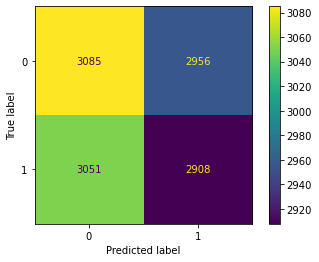

In [61]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred_, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [62]:
models_df = models_df.append({
                'Model Class' : 'Random Forest',
                'Accuracy'    : accuracy_score(y_test, y_pred_),
                'F1-score'    : str(f1_score(y_test, y_pred_, average=None)),
                'Threshold'   : thres,
                'Parameters'  : str(grid_search.best_params_),
                'Log Loss'    : log_loss(y_test, y_pred)
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\2796668437.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [63]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211


### 3. AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train_enc, y_train)

AdaBoostClassifier(random_state=42)

In [66]:
y_pred_train = model.predict(X_train_enc)
y_pred       = model.predict(X_test_enc)

In [67]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.53      0.49      0.51     13959
         1.0       0.53      0.57      0.55     14041

    accuracy                           0.53     28000
   macro avg       0.53      0.53      0.53     28000
weighted avg       0.53      0.53      0.53     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48      6041
         1.0       0.49      0.53      0.51      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



Well, the accuracy is low on both the training and test set. Hence, Underfitting.

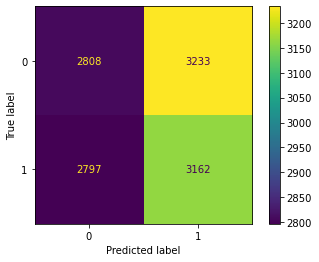

In [68]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In case of AdaBoost, we can see that the model is as good as giving zeros for every input.

In [69]:
print('Log loss for the test data : ', log_loss(y_test, model.predict_proba(X_test_enc)))

Log loss for the test data :  0.6930812353815596


Now, we will do the Hyperparameter tuning using `GridSearchCV`

In [70]:
param_grid = {
    'n_estimators': [50, 70, 100],
    'algorithm': ['SAMME.R'],
    'learning_rate': [1e-3, 1e-5, 1e-7]
}

In [71]:
model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, scoring=LogLoss)
grid_search.fit(X_train_enc, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.001, 1e-05, 1e-07],
                         'n_estimators': [50, 70, 100]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [72]:
grid_search.best_params_, grid_search.best_score_

({'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 100},
 -0.6934201279612605)

#### Let's see the log loss and accuracy on the test data.

In [73]:
y_pred  = grid_search.predict_proba(X_test_enc)
y_pred_ = grid_search.predict(X_test_enc)

In [74]:
np.unique(y_pred)

array([0.47687419, 0.48555166, 0.49231204, 0.4989986 , 0.5010014 ,
       0.50768796, 0.51444834, 0.52312581])

In [75]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, y_pred))

Accuracy for our Test data comes out to be 0.5035
F1 Score for our Test data comes out to be [0.56536329 0.42110377]
Log Loss for our Test data comes out to be 0.6931667253484118


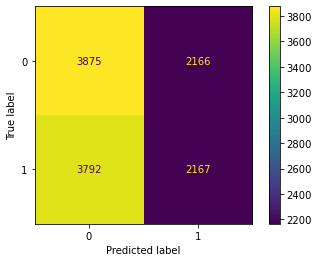

In [76]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred_, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [77]:
models_df = models_df.append({
                'Model Class' : 'AdaBoost',
                'Accuracy'    : accuracy_score(y_test, y_pred_),
                'F1-score'    : str(f1_score(y_test, y_pred_, average=None)),
                'Threshold'   : None,
                'Parameters'  : str(grid_search.best_params_),
                'Log Loss'    : log_loss(y_test, y_pred)
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\2569519969.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [78]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167


We will now look at another model that doesn't need any feature scaling. This is not a Tree Based Model.

### 4. Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
model = GaussianNB()
model.fit(X_train_enc, y_train)

GaussianNB()

In [81]:
y_pred_train = model.predict(X_train_enc)
y_pred       = model.predict(X_test_enc)
y_pred_      = model.predict_proba(X_test_enc)

In [82]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.52      0.30      0.38     13959
         1.0       0.51      0.72      0.60     14041

    accuracy                           0.51     28000
   macro avg       0.51      0.51      0.49     28000
weighted avg       0.51      0.51      0.49     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.51      0.29      0.37      6041
         1.0       0.50      0.71      0.59      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.48     12000
weighted avg       0.50      0.50      0.48     12000



Well, the accuracy is low on both the training and test set. But, we can also notice from the warnings that the f1 score for class 1 is pretty low. Hence, poor model.

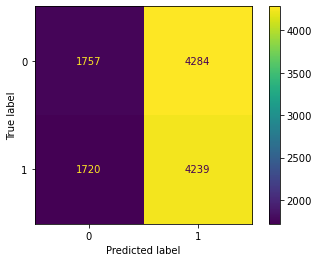

In [83]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In case of Naive Bayes, model is giving lots of false negatives.

In [84]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, y_pred_))

Accuracy for our Test data comes out to be 0.49966666666666665
F1 Score for our Test data comes out to be [0.36919521 0.58541638]
Log Loss for our Test data comes out to be 0.7059818770219857


In [85]:
models_df = models_df.append({
                'Model Class' : 'Gaussian Naive Bayes',
                'Accuracy'    : accuracy_score(y_test, y_pred),
                'F1-score'    : str(f1_score(y_test, y_pred, average=None)),
                'Threshold'   : None,
                'Parameters'  : None,
                'Log Loss'    : log_loss(y_test, y_pred_)
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\3036352362.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [86]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167
3,Gaussian Naive Bayes,0.499667,[0.36919521 0.58541638],None,None,0.705982


We have tried all our tree based models. Now, it is time to proceed to further feature engineering before we head into further modelling techniques such as `Logistic Regression`, `K-Nearest Neighbours` and `Support Vector Machines`.

## Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [88]:
tf_scale = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), slice(0,18))
], remainder='passthrough')

In [89]:
X_train_sca = tf_scale.fit_transform(X_train_enc)
X_test_sca  = tf_scale.fit_transform(X_test_enc)

## Modelling

### 5. Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression(random_state=42)
model.fit(X_train_enc, y_train)

LogisticRegression(random_state=42)

#### Using non scaled data

In [92]:
y_pred_train = model.predict(X_train_enc)
y_pred       = model.predict(X_test_enc)

In [93]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.50      0.24      0.32     13959
         1.0       0.50      0.76      0.61     14041

    accuracy                           0.50     28000
   macro avg       0.50      0.50      0.46     28000
weighted avg       0.50      0.50      0.46     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.23      0.32      6041
         1.0       0.49      0.76      0.60      5959

    accuracy                           0.49     12000
   macro avg       0.49      0.50      0.46     12000
weighted avg       0.49      0.49      0.46     12000



#### Using scaled data

In [94]:
model = LogisticRegression(random_state=42)
model.fit(X_train_sca, y_train)

LogisticRegression(random_state=42)

In [95]:
y_pred_train = model.predict(X_train_sca)
y_pred       = model.predict(X_test_sca)

In [96]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.52      0.48      0.50     13959
         1.0       0.52      0.56      0.54     14041

    accuracy                           0.52     28000
   macro avg       0.52      0.52      0.52     28000
weighted avg       0.52      0.52      0.52     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48      6041
         1.0       0.50      0.54      0.52      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



We are getting better F1-score for the classes using scaled data with similar accuracies.

Again, the same thing using scaled data...

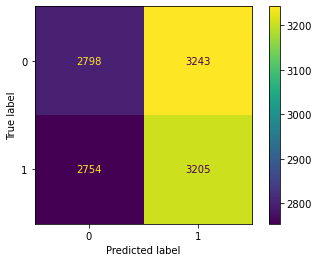

In [97]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

Not making much sense.

In [98]:
print('Log loss for the test data : ', log_loss(y_test, model.predict_proba(X_test_sca)))

Log loss for the test data :  0.6936783142852261


Now, we will do the Hyperparameter tuning using `GridSearchCV`

In [99]:
param_grid = {
    'solver': ['lbfgs'],
    'penalty': ['l2', 'none'],
    'max_iter': [100, 50],
}

In [100]:
model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, scoring=LogLoss)
grid_search.fit(X_train_sca, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'max_iter': [100, 50], 'penalty': ['l2', 'none'],
                         'solver': ['lbfgs']},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [101]:
grid_search.best_params_, grid_search.best_score_

({'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}, -0.6933009851063524)

In [102]:
y_pred = grid_search.predict_proba(X_test_sca)
y_pred_ = grid_search.predict(X_test_sca)

In [103]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, y_pred))

Accuracy for our Test data comes out to be 0.50025
F1 Score for our Test data comes out to be [0.48270508 0.51664383]
Log Loss for our Test data comes out to be 0.6936783142852261


In [104]:
thres, _ = tuning_proba(y_pred, y_test)
thres

0.4888888888888889

In [105]:
y_pred_ = post_predict(y_pred, thres)
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))

Accuracy for our Test data comes out to be 0.49883333333333335
F1 Score for our Test data comes out to be [0.5024818  0.49513096]


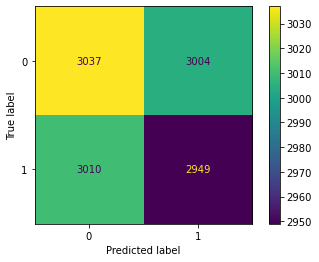

In [106]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred_, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [107]:
models_df = models_df.append({
                'Model Class' : 'Logistic Regression',
                'Accuracy'    : accuracy_score(y_test, y_pred_),
                'F1-score'    : str(f1_score(y_test, y_pred_, average=None)),
                'Threshold'   : thres,
                'Parameters'  : str(grid_search.best_params_),
                'Log Loss'    : log_loss(y_test, y_pred)
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\4291356847.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [108]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167
3,Gaussian Naive Bayes,0.499667,[0.36919521 0.58541638],None,None,0.705982
4,Logistic Regression,0.498833,[0.5024818 0.49513096],0.488889,"{'max_iter': 100, 'penalty': 'l2', 'solver': '...",0.693678


### 6. K Nearest Neighbour

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
model = KNeighborsClassifier()
model.fit(X_train_enc, y_train)

KNeighborsClassifier()

#### Using non scaled data

In [111]:
y_pred_train = model.predict(X_train_enc)
y_pred       = model.predict(X_test_enc)

In [112]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69     13959
         1.0       0.69      0.69      0.69     14041

    accuracy                           0.69     28000
   macro avg       0.69      0.69      0.69     28000
weighted avg       0.69      0.69      0.69     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50      6041
         1.0       0.50      0.50      0.50      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



Well, the accuracy is low on both the training and test set.

#### Using scaled data

In [113]:
model = KNeighborsClassifier()
model.fit(X_train_sca, y_train)

KNeighborsClassifier()

In [114]:
y_pred_train = model.predict(X_train_sca)
y_pred       = model.predict(X_test_sca)

In [115]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69     13959
         1.0       0.69      0.69      0.69     14041

    accuracy                           0.69     28000
   macro avg       0.69      0.69      0.69     28000
weighted avg       0.69      0.69      0.69     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.49      0.49      6041
         1.0       0.49      0.50      0.50      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



Again, the same thing using scaled data...

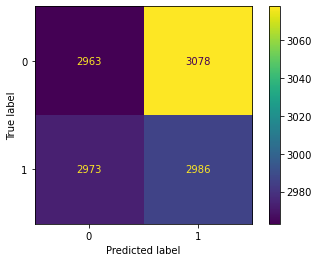

In [116]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

Not making much sense.

In [117]:
print('Log loss for the test data : ', log_loss(y_test, model.predict_proba(X_test_sca)))

Log loss for the test data :  1.773203337614453


Now, we will do the Hyperparameter tuning using `GridSearchCV`

In [131]:
param_grid = {
    'n_neighbors': [80, 90, 100],
}

In [132]:
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, scoring=LogLoss)
grid_search.fit(X_train_sca, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [80, 90, 100]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [133]:
grid_search.best_params_, grid_search.best_score_

({'n_neighbors': 100}, -0.6961243334047349)

In [134]:
y_pred = grid_search.predict_proba(X_test_sca)
y_pred_ = grid_search.predict(X_test_sca)

In [135]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, y_pred))

Accuracy for our Test data comes out to be 0.5035
F1 Score for our Test data comes out to be [0.51387076 0.49267711]
Log Loss for our Test data comes out to be 0.6977972353598306


In [136]:
thres, _ = tuning_proba(y_pred, y_test)
thres

0.46060606060606063

In [137]:
y_pred_ = post_predict(y_pred, thres)
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))

Accuracy for our Test data comes out to be 0.5001666666666666
F1 Score for our Test data comes out to be [0.50649992 0.49366875]


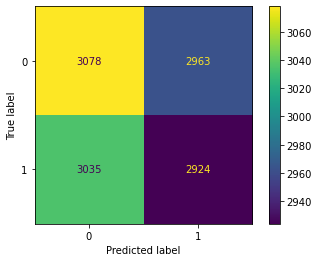

In [138]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred_, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [139]:
models_df = models_df.append({
                'Model Class' : 'K Nearest Neighbour',
                'Accuracy'    : accuracy_score(y_test, y_pred_),
                'F1-score'    : str(f1_score(y_test, y_pred_, average=None)),
                'Threshold'   : thres,
                'Parameters'  : str(grid_search.best_params_),
                'Log Loss'    : log_loss(y_test, y_pred)
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\2431212100.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [140]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167
3,Gaussian Naive Bayes,0.499667,[0.36919521 0.58541638],None,None,0.705982
4,Logistic Regression,0.498833,[0.5024818 0.49513096],0.488889,"{'max_iter': 100, 'penalty': 'l2', 'solver': '...",0.693678
5,K Nearest Neighbour,0.500167,[0.50649992 0.49366875],0.460606,{'n_neighbors': 100},0.697797


### 7. Support Vector Machines

In [141]:
from sklearn.svm import SVC

In [143]:
model = SVC(probability=True)
model.fit(X_train_enc, y_train)

SVC(probability=True)

#### Using non scaled data

In [144]:
y_pred_train = model.predict(X_train_enc)
y_pred       = model.predict(X_test_enc)

In [145]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.51      0.18      0.26     13959
         1.0       0.50      0.83      0.63     14041

    accuracy                           0.50     28000
   macro avg       0.51      0.50      0.45     28000
weighted avg       0.51      0.50      0.45     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.51      0.19      0.28      6041
         1.0       0.50      0.81      0.62      5959

    accuracy                           0.50     12000
   macro avg       0.51      0.50      0.45     12000
weighted avg       0.51      0.50      0.45     12000



#### Using scaled data

In [162]:
model = SVC(probability=True)
model.fit(X_train_sca, y_train)

SVC(probability=True)

In [163]:
y_pred_train = model.predict(X_train_sca)
y_pred       = model.predict(X_test_sca)

In [164]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.61      0.59      0.60     13959
         1.0       0.61      0.63      0.62     14041

    accuracy                           0.61     28000
   macro avg       0.61      0.61      0.61     28000
weighted avg       0.61      0.61      0.61     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49      6041
         1.0       0.50      0.52      0.51      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



Accuracy on train data increases when we use scaled data. Also F1 score improves.

Again, the same thing using scaled data...

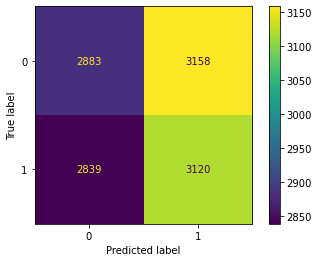

In [165]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

Not making much sense.

In [167]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, model.predict_proba(X_test_sca)))

Accuracy for our Test data comes out to be 0.50025
F1 Score for our Test data comes out to be [0.49018108 0.5099289 ]
Log Loss for our Test data comes out to be 0.6931299718854771


In [168]:
models_df = models_df.append({
                'Model Class' : 'Support Vector Machines',
                'Accuracy'    : accuracy_score(y_test, y_pred_),
                'F1-score'    : str(f1_score(y_test, y_pred_, average=None)),
                'Threshold'   : None,
                'Parameters'  : None,
                'Log Loss'    : log_loss(y_test, model.predict_proba(X_test_sca))
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\1544649240.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [169]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167
3,Gaussian Naive Bayes,0.499667,[0.36919521 0.58541638],None,None,0.705982
4,Logistic Regression,0.498833,[0.5024818 0.49513096],0.488889,"{'max_iter': 100, 'penalty': 'l2', 'solver': '...",0.693678
5,K Nearest Neighbour,0.500167,[0.50649992 0.49366875],0.460606,{'n_neighbors': 100},0.697797
6,Support Vector Machines,0.498417,[0.29823948 0.6097387 ],None,None,0.693130


### 8. XGBoost
Though a tree based model, kept it till the end as it is one of the best models known.

In [170]:
from xgboost import XGBClassifier

In [173]:
model = XGBClassifier()
model.fit(X_train_sca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [174]:
y_pred_train = model.predict(X_train_sca)
y_pred       = model.predict(X_test_sca)

In [175]:
print('Training :- ')
print(classification_report(y_train, y_pred_train))
print('Testing :- ')
print(classification_report(y_test, y_pred))

Training :- 
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71     13959
         1.0       0.71      0.73      0.72     14041

    accuracy                           0.71     28000
   macro avg       0.71      0.71      0.71     28000
weighted avg       0.71      0.71      0.71     28000

Testing :- 
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49      6041
         1.0       0.50      0.52      0.51      5959

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



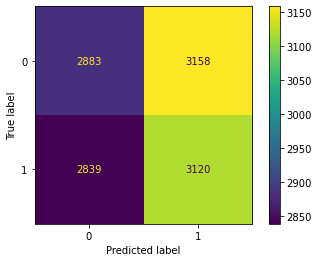

In [165]:
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [176]:
print('Log loss for the test data : ', log_loss(y_test, model.predict_proba(X_test_sca)))

Log loss for the test data :  0.7148271891288459


Now, we will do the Hyperparameter tuning using `GridSearchCV`

In [191]:
param_grid = {
    'max_depth': [10],
    'learning_rate': [1e-3, 1e-5],
    'booster': ['gbtree'],
    'reg_alpha': [0, 0.5, 1, 1.5],
    'reg_lambda': [0, 0.5, 1, 1.5],
    'colsample_bytree': [.5, .8, .9],
}

In [192]:
model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, scoring=LogLoss)
grid_search.fit(X_train_sca, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

In [193]:
grid_search.best_params_, grid_search.best_score_

({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'learning_rate': 0.001,
  'max_depth': 10,
  'reg_alpha': 1,
  'reg_lambda': 0},
 -0.6930711708004985)

In [194]:
y_pred = grid_search.predict_proba(X_test_sca)
y_pred_ = grid_search.predict(X_test_sca)

In [195]:
print('Accuracy for our Test data comes out to be', accuracy_score(y_test, y_pred_))
print('F1 Score for our Test data comes out to be', f1_score(y_test, y_pred_, average=None))
print('Log Loss for our Test data comes out to be', log_loss(y_test, y_pred))

Accuracy for our Test data comes out to be 0.5084166666666666
F1 Score for our Test data comes out to be [0.49080708 0.52484897]
Log Loss for our Test data comes out to be 0.6930954605837663


In [199]:
models_df = models_df.append({
                'Model Class' : 'XGBoost',
                'Accuracy'    : accuracy_score(y_test, y_pred_),
                'F1-score'    : str(f1_score(y_test, y_pred_, average=None)),
                'Threshold'   : None,
                'Parameters'  : str(grid_search.best_params_),
                'Log Loss'    : log_loss(y_test, y_pred)
               }, ignore_index = True)

C:\Users\Msc 2\AppData\Local\Temp\ipykernel_6744\1935061577.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_df = models_df.append({


In [200]:
models_df

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167
3,Gaussian Naive Bayes,0.499667,[0.36919521 0.58541638],None,None,0.705982
4,Logistic Regression,0.498833,[0.5024818 0.49513096],0.488889,"{'max_iter': 100, 'penalty': 'l2', 'solver': '...",0.693678
5,K Nearest Neighbour,0.500167,[0.50649992 0.49366875],0.460606,{'n_neighbors': 100},0.697797
6,Support Vector Machines,0.498417,[0.29823948 0.6097387 ],None,None,0.693130
7,XGBoost,0.508417,[0.49080708 0.52484897],None,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.693095


## Conclusion

In [201]:
# sorting models in ascending order wrt Log Loss
models_df.sort_values('Log Loss')

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
7,XGBoost,0.508417,[0.49080708 0.52484897],None,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.693095
6,Support Vector Machines,0.498417,[0.29823948 0.6097387 ],None,None,0.693130
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
4,Logistic Regression,0.498833,[0.5024818 0.49513096],0.488889,"{'max_iter': 100, 'penalty': 'l2', 'solver': '...",0.693678
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
5,K Nearest Neighbour,0.500167,[0.50649992 0.49366875],0.460606,{'n_neighbors': 100},0.697797
3,Gaussian Naive Bayes,0.499667,[0.36919521 0.58541638],None,None,0.705982


In [203]:
# sorting model in the descending order of accuracies
models_df.sort_values('Accuracy', ascending=False)

,Model Class,Accuracy,F1-score,Threshold,Parameters,Log Loss
7,XGBoost,0.508417,[0.49080708 0.52484897],None,"{'booster': 'gbtree', 'colsample_bytree': 0.8,...",0.693095
2,AdaBoost,0.5035,[0.56536329 0.42110377],None,"{'algorithm': 'SAMME.R', 'learning_rate': 0.00...",0.693167
0,Decision Trees,0.501417,[0.51035273 0.49214837],0.480808,"{'max_depth': 10, 'min_samples_split': 5000}",0.694781
5,K Nearest Neighbour,0.500167,[0.50649992 0.49366875],0.460606,{'n_neighbors': 100},0.697797
3,Gaussian Naive Bayes,0.499667,[0.36919521 0.58541638],None,None,0.705982
1,Random Forest,0.499417,[0.50669295 0.49192252],0.492929,"{'max_depth': 10, 'min_samples_split': 4000, '...",0.693211
4,Logistic Regression,0.498833,[0.5024818 0.49513096],0.488889,"{'max_iter': 100, 'penalty': 'l2', 'solver': '...",0.693678
6,Support Vector Machines,0.498417,[0.29823948 0.6097387 ],None,None,0.693130


### `Inference`:
- Doing both we could see that the `XGBoost` model is giving the least log loss and also the most accuracy out of these models. 
- Closely, followed by `AdaBoost`.

Let's see the parameters that gives the best log loss for our `XGBoost` model.

In [222]:
print(models_df[models_df['Model Class'] == 'XGBoost']['Parameters'].values[0])

{'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.001, 'max_depth': 10, 'reg_alpha': 1, 'reg_lambda': 0}


# The End